In [1]:

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # matplotlib for plotting

import re # regular expressions

import warnings
warnings.filterwarnings("ignore") #because who likes annoying warnings

plt.style.use('ggplot') #prettier pictures

import datetime      #for datetime operations
import calendar      #for calendar for datetime operations
import time          #to get the system time
plt.rcParams['figure.figsize'] = [16, 10] #set default figure size

In [2]:
train = pd.read_csv('/Users/jiaxinye/NYC-taxi-data-science-project/data/clean_train.csv')

In [3]:
train.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,...,pickup_date,date,minimum temperature,precipitation,snow fall,snow depth,log_trip_duration,distance_haversine,distance_dummy_manhattan,direction
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,...,2016-03-14,2016-03-14 00:00:00,40,0.29,0.0,0.0,6.122493,1.498521,1.735433,99.970196
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,...,2016-06-12,2016-06-12 00:00:00,37,0.35,0.0,0.0,6.498282,1.805507,2.430506,-117.153768
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,...,2016-01-19,2016-01-19 00:00:00,16,0.00,0.0,0.0,7.661527,6.385098,8.203575,-159.680165
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,...,2016-04-06,2016-04-06 00:00:00,66,0.40,0.0,0.0,6.063785,1.485498,1.661331,-172.737700
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,...,2016-03-26,2016-03-26 00:00:00,38,0.00,0.0,0.0,6.077642,1.188588,1.199457,179.473585


In [4]:
#drop the unnamed columns
train = train.drop(['Unnamed: 0'],1)

In [5]:
train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_date,date,minimum temperature,precipitation,snow fall,snow depth,log_trip_duration,distance_haversine,distance_dummy_manhattan,direction
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,...,2016-03-14,2016-03-14 00:00:00,40,0.29,0.0,0.0,6.122493,1.498521,1.735433,99.970196
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,...,2016-06-12,2016-06-12 00:00:00,37,0.35,0.0,0.0,6.498282,1.805507,2.430506,-117.153768
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,...,2016-01-19,2016-01-19 00:00:00,16,0.00,0.0,0.0,7.661527,6.385098,8.203575,-159.680165
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,...,2016-04-06,2016-04-06 00:00:00,66,0.40,0.0,0.0,6.063785,1.485498,1.661331,-172.737700
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,...,2016-03-26,2016-03-26 00:00:00,38,0.00,0.0,0.0,6.077642,1.188588,1.199457,179.473585


In [8]:
#change the date to dateframe

train['pickup_datetime'] = pd.to_datetime(train.pickup_datetime)
train['dropoff_datetime'] = pd.to_datetime(train.dropoff_datetime)
train['date'] = pd.to_datetime(train.date)

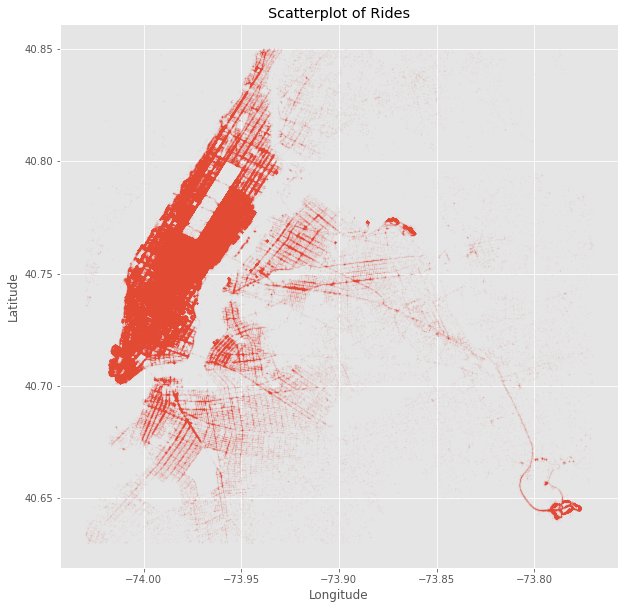

In [10]:
#use the scatter plot to see map of the location
longitude = list(train.pickup_longitude) + list(train.dropoff_longitude)
latitude = list(train.pickup_latitude) + list(train.dropoff_latitude)
plt.figure(figsize = (10,10))
plt.title('Scatterplot of Rides')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.plot(longitude,latitude,'.', alpha = 0.5, markersize = 0.05)
plt.show()

Text(0.5, 1.0, 'Passenger Count Distribution')

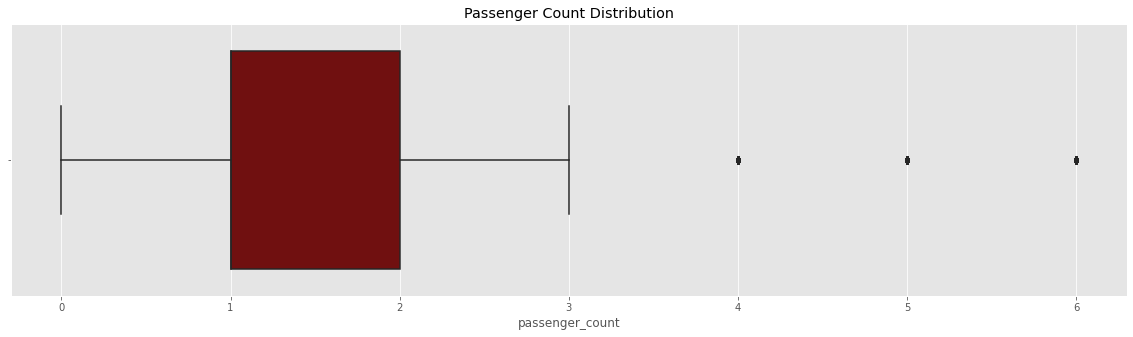

In [12]:
#passenger counts
plt.figure(figsize=(20,5))
sns.boxplot(train['passenger_count'], color='maroon')
plt.title('Passenger Count Distribution')

In [ ]:
## by the boxplot, we can see that most of the passenger are between one to two passenger
## there esxist trip with 0 passenger

[Text(0.5, 1.0, 'Distribution of ride durations'),
 Text(0.5, 0, 'Log Trip Duration (log seconds)'),
 Text(0, 0.5, 'Frequency')]

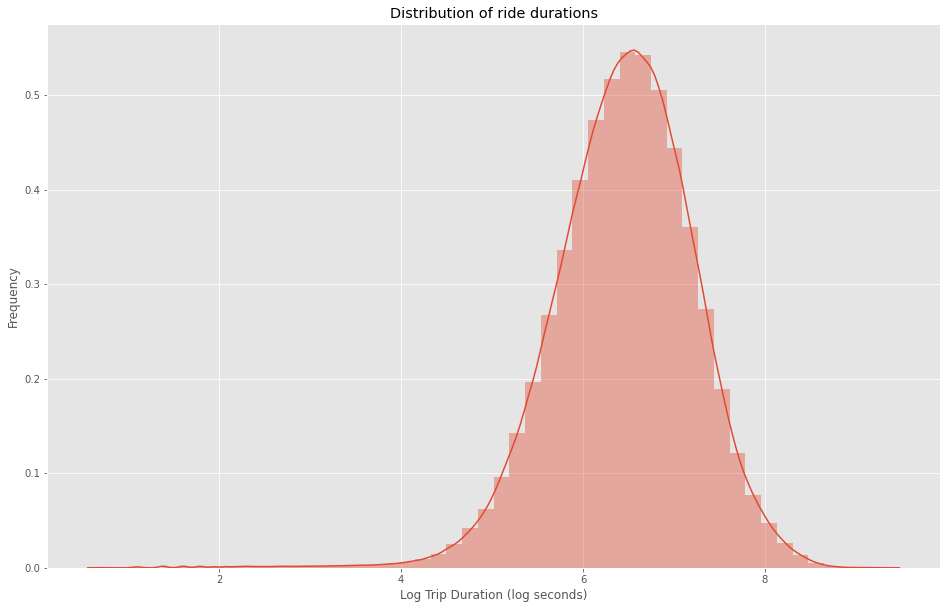

In [13]:
# - Since our Evaluation Metric is RMSLE, we'll proceed further with Log Transformed "Trip duration".
# 
# 
# - Log Transformation Smoothens outliers by proving them less weightage.
sns.distplot(train.log_trip_duration).set(title = 'Distribution of ride durations', 
                                          xlabel = 'Log Trip Duration (log seconds)',ylabel = 'Frequency')

Text(0, 0.5, 'Count (rides)')

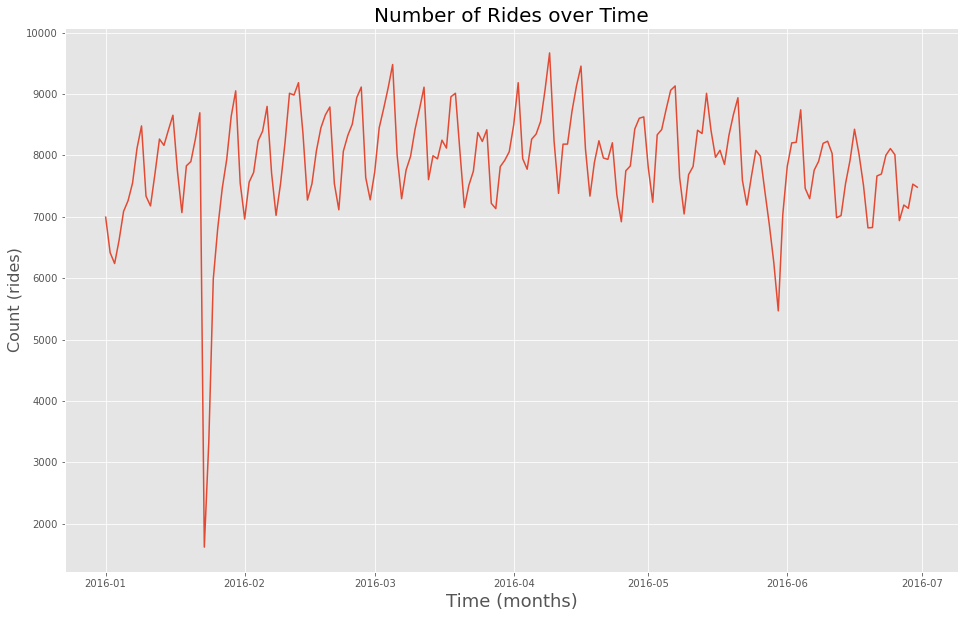

In [14]:
#monthly trips exploration
plt.plot(train.groupby('date').count()[['id']])
plt.title('Number of Rides over Time', fontsize=20)
plt.xlabel('Time (months)', fontsize=18)
plt.ylabel('Count (rides)', fontsize=16)

In [ ]:
# Number of trips in a particular month - March and April marking the highest.
#January being lowest probably due to extreme SnowFall NYC

[Text(0.5, 1.0, 'Snow fall per day'),
 Text(0, 0.5, 'Snow fall (inches)'),
 Text(0.5, 0, 'Date')]

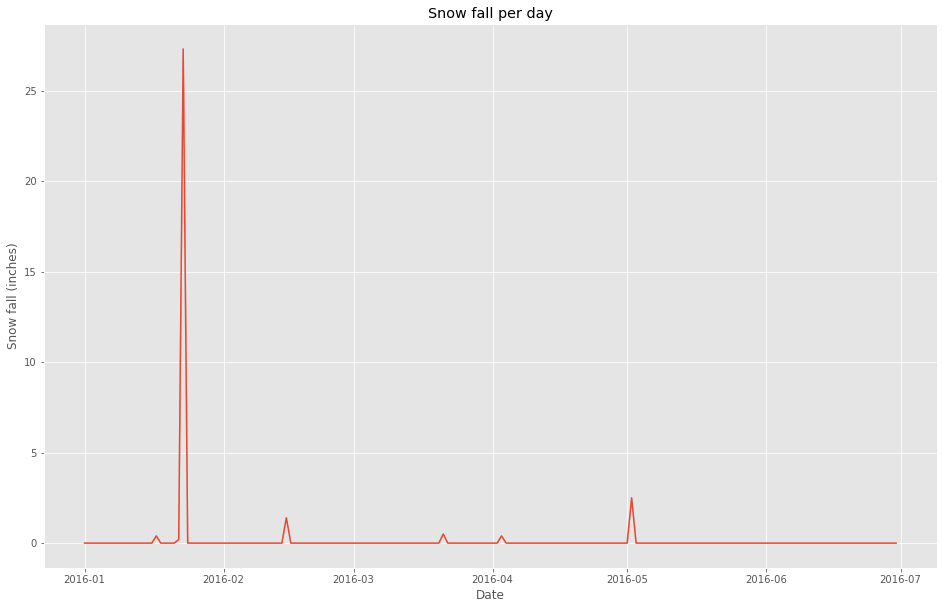

In [17]:
sns.lineplot(x="date", y="snow fall", data=train).set(title = 'Snow fall per day',
                                                      ylabel = 'Snow fall (inches)', xlabel= 'Date')

In [18]:
#Extracting day, month, date, hour, mins, weekday from datetime

train['pickup_day'] = train['pickup_datetime'].dt.day
train['pickup_month'] = train['pickup_datetime'].dt.month
train['pickup_date'] = train['pickup_datetime'].dt.date
train['pickup_hour'] = train['pickup_datetime'].dt.hour
train['pickup_min'] = train['pickup_datetime'].dt.minute
train['pickup_weekday'] = train['pickup_datetime'].dt.weekday

train['dropoff_min'] = train['dropoff_datetime'].dt.minute

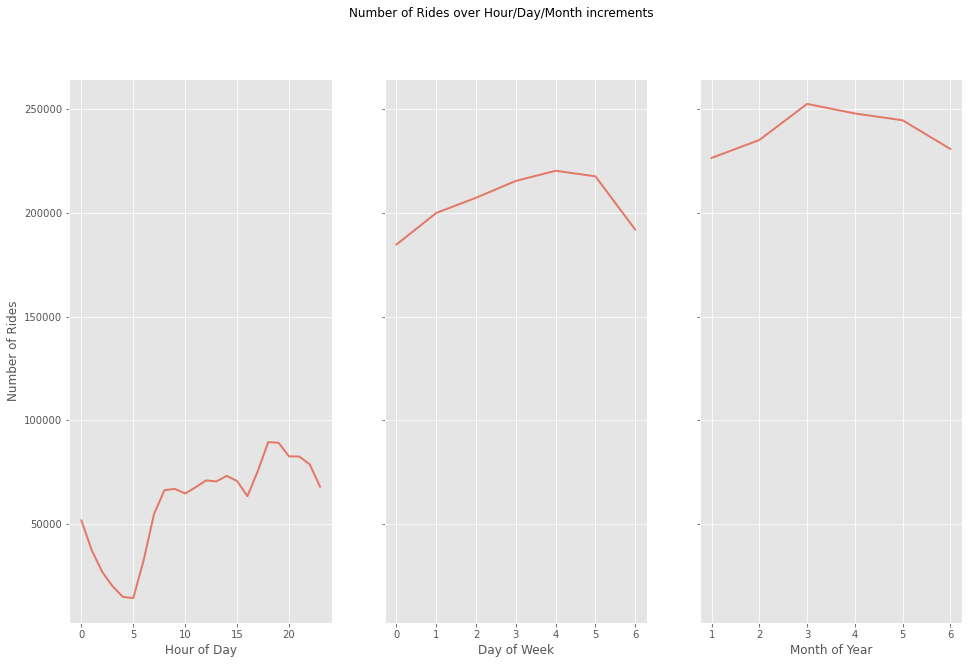

In [19]:
fig, ax = plt.subplots(ncols=3, sharey=True)
ax[0].plot(train.groupby('pickup_hour').count()['id'], lw=2, alpha=0.7)
ax[1].plot(train.groupby('pickup_weekday').count()['id'], lw=2, alpha=0.7)
ax[2].plot(train.groupby('pickup_month').count()['id'], lw=2, alpha=0.7)
ax[0].set_xlabel('Hour of Day')
ax[1].set_xlabel('Day of Week')
ax[2].set_xlabel('Month of Year')
ax[0].set_ylabel('Number of Rides')
fig.suptitle('Number of Rides over Hour/Day/Month increments')
plt.show()

In [ ]:
## in which hour we get to see maximum pickups ? - Rush hours (5 pm to 10 pm), probably office leaving time.
##